# Final Project - DataPrep_EDA.ipynb
Name: Bryce DiRisio

Class: CSCI349 - Intro to Data Mining

Semester: 2020sp

Instructor: Brian King

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part I: Data Understanding and Cleaning

### What problem are you working on? Summarize in a single cell.

The dataset I am looking at involves information regarding wildlife trade. With this information, I am trying to gain a better sense of what factors go into trade. Part of this also involves finding identifying information that can help to locate and classify certain trades that occur. I plan on achieving two goals: 1) Using apriori methods in order to find possible frequent patterns that can persist between importers, exporters, and items traded. 2) Finding possible identifying categorical variables that can help to predict trade quantities (through the Keras library).

### What data are you using to understand the problem? Describe the data in a very general sense. Where did it come from? You should understand what every observation in the data represents, and what each variable represents.

I am using wildlife trade data found from Kaggle (https://www.kaggle.com/cites/cites-wildlife-trade-database) in order to investigate this problem. This data was procured from the Convention on International Trade in Endangered Species of Wild Fauna and Flora (CITES), which is dedicated towards the conservation and preservation of endangered species. The dataset under observation contains records on every recorded international trade conducted in 2016. 

Variable descriptions are at the bottom of Part I.

In [49]:
df_raw = pd.read_csv('data\\wildlife_data_raw.csv')
df_raw

Year App.                 Taxon     Class          Order        Family  \
0      2016    I        Aquila heliaca      Aves  Falconiformes  Accipitridae   
1      2016    I        Aquila heliaca      Aves  Falconiformes  Accipitridae   
2      2016    I  Haliaeetus albicilla      Aves  Falconiformes  Accipitridae   
3      2016    I  Haliaeetus albicilla      Aves  Falconiformes  Accipitridae   
4      2016    I  Haliaeetus albicilla      Aves  Falconiformes  Accipitridae   
...     ...  ...                   ...       ...            ...           ...   
67156  2017  III          Canis aureus  Mammalia      Carnivora       Canidae   
67157  2017  III     Sarcoramphus papa      Aves  Falconiformes   Cathartidae   
67158  2017  III       Daboia russelii  Reptilia      Serpentes     Viperidae   
67159  2017  III   Civettictis civetta  Mammalia      Carnivora    Viverridae   
67160  2017  III   Civettictis civetta  Mammalia      Carnivora    Viverridae   

              Genus Importer Exporter Origin  Importer reported quantity  \
0            Aquila       TR       NL     CZ                         NaN   
1            Aquila       XV       RS     RS                         NaN   
2        Haliaeetus       BE       NO    NaN                         NaN   
3        Haliaeetus       BE       NO    NaN                         NaN   
4        Haliaeetus       DK       IS    NaN                       700.0   
...             ...      ...      ...    ...                         ...   
67156         Canis       US       ET    NaN                         NaN   
67157  Sarcoramphus       JP       PE    NaN                         NaN   
67158        Daboia       RS       IT     US                       200.0   
67159   Civettictis       FR       ET    NaN                         NaN   
67160   Civettictis       KR       ET    NaN                         NaN   

       Exporter reported quantity       Term Unit Purpose Source  
0                             1.0     bodies  NaN       T      C  
1                             1.0     bodies  NaN       Q      O  
2                            43.0   feathers  NaN       S      W  
3                            43.0  specimens  NaN       S      W  
4                             NaN  specimens  NaN       S      W  
...                           ...        ...  ...     ...    ...  
67156                         7.0   trophies  NaN       H      W  
67157                         2.0       live  NaN       T      F  
67158                         NaN  specimens  NaN       T      F  
67159                       635.1       musk   kg       T      R  
67160                       480.0       musk   kg       T      R  

[67161 rows x 16 columns]

In [50]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67161 entries, 0 to 67160
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        67161 non-null  int64  
 1   App.                        67161 non-null  object 
 2   Taxon                       67161 non-null  object 
 3   Class                       46937 non-null  object 
 4   Order                       67104 non-null  object 
 5   Family                      66700 non-null  object 
 6   Genus                       65702 non-null  object 
 7   Importer                    67090 non-null  object 
 8   Exporter                    66588 non-null  object 
 9   Origin                      25643 non-null  object 
 10  Importer reported quantity  31866 non-null  float64
 11  Exporter reported quantity  44021 non-null  float64
 12  Term                        67161 non-null  object 
 13  Unit                        640

In [51]:
df_raw.loc[:,'App.'] = df_raw.loc[:,'App.'].astype('category')
df_raw.loc[:,'Taxon'] = df_raw.loc[:,'Taxon'].astype('category')
df_raw.loc[:,'Class'] = df_raw.loc[:,'Class'].astype('category')
df_raw.loc[:,'Order'] = df_raw.loc[:,'Order'].astype('category')
df_raw.loc[:,'Family'] = df_raw.loc[:,'Family'].astype('category')
df_raw.loc[:,'Genus'] = df_raw.loc[:,'Genus'].astype('category')
df_raw.loc[:,'Importer'] = df_raw.loc[:,'Importer'].astype('category')
df_raw.loc[:,'Exporter'] = df_raw.loc[:,'Exporter'].astype('category')
df_raw.loc[:,'Origin'] = df_raw.loc[:,'Origin'].astype('category')
df_raw.loc[:,'Term'] = df_raw.loc[:,'Term'].astype('category')
df_raw.loc[:,'Unit'] = df_raw.loc[:,'Unit'].astype('category')
df_raw.loc[:,'Purpose'] = df_raw.loc[:,'Purpose'].astype('category')
df_raw.loc[:,'Source'] = df_raw.loc[:,'Source'].astype('category')

In [52]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67161 entries, 0 to 67160
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Year                        67161 non-null  int64   
 1   App.                        67161 non-null  category
 2   Taxon                       67161 non-null  category
 3   Class                       46937 non-null  category
 4   Order                       67104 non-null  category
 5   Family                      66700 non-null  category
 6   Genus                       65702 non-null  category
 7   Importer                    67090 non-null  category
 8   Exporter                    66588 non-null  category
 9   Origin                      25643 non-null  category
 10  Importer reported quantity  31866 non-null  float64 
 11  Exporter reported quantity  44021 non-null  float64 
 12  Term                        67161 non-null  category
 13  Unit            

In [53]:
df_2017 = pd.DataFrame([df_raw.iloc[i] for i in range(df_raw.shape[0]) if df_raw.iloc[i,0] == 2017])
df_2017 

Year App.                Taxon     Class          Order        Family  \
67007  2017    I   Loxodonta africana  Mammalia    Proboscidea  Elephantidae   
67008  2017    I   Loxodonta africana  Mammalia    Proboscidea  Elephantidae   
67009  2017    I   Loxodonta africana  Mammalia    Proboscidea  Elephantidae   
67010  2017    I     Falco rusticolus      Aves  Falconiformes    Falconidae   
67011  2017    I     Falco rusticolus      Aves  Falconiformes    Falconidae   
...     ...  ...                  ...       ...            ...           ...   
67156  2017  III         Canis aureus  Mammalia      Carnivora       Canidae   
67157  2017  III    Sarcoramphus papa      Aves  Falconiformes   Cathartidae   
67158  2017  III      Daboia russelii  Reptilia      Serpentes     Viperidae   
67159  2017  III  Civettictis civetta  Mammalia      Carnivora    Viverridae   
67160  2017  III  Civettictis civetta  Mammalia      Carnivora    Viverridae   

              Genus Importer Exporter Origin  Importer reported quantity  \
67007     Loxodonta       ZA       MW    NaN                         NaN   
67008     Loxodonta       ZA       MW    NaN                         NaN   
67009     Loxodonta       ZA       MW    NaN                         NaN   
67010         Falco       SI       AE     ES                         1.0   
67011         Falco       SI       AE     GB                         2.0   
...             ...      ...      ...    ...                         ...   
67156         Canis       US       ET    NaN                         NaN   
67157  Sarcoramphus       JP       PE    NaN                         NaN   
67158        Daboia       RS       IT     US                       200.0   
67159   Civettictis       FR       ET    NaN                         NaN   
67160   Civettictis       KR       ET    NaN                         NaN   

       Exporter reported quantity       Term Unit Purpose Source  
67007                        34.8  specimens    l       S      W  
67008                        20.0  specimens   ml       S      W  
67009                       120.0  specimens  NaN       S      W  
67010                         NaN       live  NaN       T      C  
67011                         NaN       live  NaN       T      C  
...                           ...        ...  ...     ...    ...  
67156                         7.0   trophies  NaN       H      W  
67157                         2.0       live  NaN       T      F  
67158                         NaN  specimens  NaN       T      F  
67159                       635.1       musk   kg       T      R  
67160                       480.0       musk   kg       T      R  

[154 rows x 16 columns]

In [54]:
#df_2016 = pd.DataFrame([df_raw.iloc[i] for i in range(df_raw.shape[0]) if df_raw.iloc[i,0] == 2016])
#df_2016 

The commented code above is to verify that all other years besides 2017 are in fact 2016. It is ommitted since it takes a couple minutes to run.
For the purpose of speed, the code below will get the same dataframe as above. The results are the same with either piece of code.

In [55]:
df_2016 = df_raw.iloc[0:67007]
df_2016

Year App.                     Taxon     Class             Order  \
0      2016    I            Aquila heliaca      Aves     Falconiformes   
1      2016    I            Aquila heliaca      Aves     Falconiformes   
2      2016    I      Haliaeetus albicilla      Aves     Falconiformes   
3      2016    I      Haliaeetus albicilla      Aves     Falconiformes   
4      2016    I      Haliaeetus albicilla      Aves     Falconiformes   
...     ...  ...                       ...       ...               ...   
67002  2016    N  Selaginella lepidophylla       NaN    Selaginellales   
67003  2016    N  Selaginella lepidophylla       NaN    Selaginellales   
67004  2016    N          Struthio camelus      Aves  Struthioniformes   
67005  2016    N       Lamprotornis regius      Aves     Passeriformes   
67006  2016    N   Calloselasma rhodostoma  Reptilia         Serpentes   

                Family         Genus Importer Exporter Origin  \
0         Accipitridae        Aquila       TR       NL     CZ   
1         Accipitridae        Aquila       XV       RS     RS   
2         Accipitridae    Haliaeetus       BE       NO    NaN   
3         Accipitridae    Haliaeetus       BE       NO    NaN   
4         Accipitridae    Haliaeetus       DK       IS    NaN   
...                ...           ...      ...      ...    ...   
67002  Selaginellaceae   Selaginella       DE       MX    NaN   
67003  Selaginellaceae   Selaginella       DE       MX    NaN   
67004    Struthionidae      Struthio       RO       CH     ZA   
67005        Sturnidae  Lamprotornis       DE       TZ    NaN   
67006        Viperidae  Calloselasma       NL       ID    NaN   

       Importer reported quantity  Exporter reported quantity  \
0                             NaN                         1.0   
1                             NaN                         1.0   
2                             NaN                        43.0   
3                             NaN                        43.0   
4                           700.0                         NaN   
...                           ...                         ...   
67002                       162.3                         NaN   
67003                      5000.0                         NaN   
67004                         1.0                         NaN   
67005                        10.0                         NaN   
67006                        15.0                         NaN   

                           Term Unit Purpose Source  
0                        bodies  NaN       T      C  
1                        bodies  NaN       Q      O  
2                      feathers  NaN       S      W  
3                     specimens  NaN       S      W  
4                     specimens  NaN       S      W  
...                         ...  ...     ...    ...  
67002              dried plants   kg       T      W  
67003                    leaves   kg       T      W  
67004  leather products (small)  NaN       T      C  
67005                      live  NaN       T      U  
67006                      live  NaN     NaN    NaN  

[67007 rows x 16 columns]

Here, we can see that from the 67,161 rows of data in our df_raw dataset, only 154 of them are from the year 2017, while the rest are from 2016. This accounts for ~0.23% of our overall data. In order to further specialize our analysis, we will only look at data from 2016 and omit the 154 datapoints from 2017. That way, we will not have to consider any implications regarding change in year for our analysis, and can focus our research on the trends for solely the 2016 year.

In [56]:
df_raw = df_2016

In [57]:
df_raw.iloc[:,7] = df_raw.iloc[:,7].cat.add_categories('0')
df_raw.iloc[:,7] = df_raw.iloc[:,7].fillna(value='0')
df_raw.iloc[:,8] = df_raw.iloc[:,8].cat.add_categories('0')
df_raw.iloc[:,8] = df_raw.iloc[:,8].fillna(value='0')
df_raw.iloc[:,15] = df_raw.iloc[:,15].cat.add_categories('0')
df_raw.iloc[:,15] = df_raw.iloc[:,15].fillna(value='0')
df_missing_imp_exp = pd.DataFrame([df_raw.iloc[i] for i in range(df_raw.shape[0]) if (df_raw.iloc[i,7]=='0' or df_raw.iloc[i,8]=='0')])
df_missing_source = pd.DataFrame([df_raw.iloc[i] for i in range(df_raw.shape[0]) if (df_raw.iloc[i,15]=='0')])

C:\Users\temp\anaconda3\envs\csci349\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Looking at df_raw.info() further, we can see that 'Importer' and 'Exporter' are both almost complete variables. As this is an extremely valuable variable for our study, I am going to remove any and all 'null' data rows from either of these two. This is also only being done since the total number of cells that fall into this removal criteria is less than 1% of our overall data (643/67007).

We can also see that the 'Source' column also has some data missing (535 entries). Again, this accounts for less than 1% of our observations (535/67007), so I believe in removing these entries in order to get fully encompassing data rows.

In [58]:
indices_ie = df_missing_imp_exp.index.values.tolist()
indices_s = df_missing_source.index.values.tolist()
indices = list(set().union(indices_ie,indices_s))
df_raw = df_raw.drop(indices)
df_raw = df_raw.reset_index(drop=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65829 entries, 0 to 65828
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Year                        65829 non-null  int64   
 1   App.                        65829 non-null  category
 2   Taxon                       65829 non-null  category
 3   Class                       45736 non-null  category
 4   Order                       65772 non-null  category
 5   Family                      65370 non-null  category
 6   Genus                       64381 non-null  category
 7   Importer                    65829 non-null  category
 8   Exporter                    65829 non-null  category
 9   Origin                      25365 non-null  category
 10  Importer reported quantity  31177 non-null  float64 
 11  Exporter reported quantity  43217 non-null  float64 
 12  Term                        65829 non-null  category
 13  Unit            

In [59]:
pd.DataFrame([df_raw.iloc[i] for i in range(df_raw.shape[0]) if (np.isnan(df_raw.iloc[i,10]) and (np.isnan(df_raw.iloc[i,11])))])

Empty DataFrame
Columns: []
Index: []

The above dataframe tells us that for columns 10 and 11 (importer reported quantity and exporter reported quantity), there is at least one reported quantity measurement per row (no rows present where both importer and exporter quantities are 'NaN'. We may be able to reduce these two columns into one 'quantity column'. Let's see if there's any instances where there's two different reported quantities:

In [60]:
df_two_quantities = pd.DataFrame([df_raw.iloc[i] for i in range(df_raw.shape[0]) if (~np.isnan(df_raw.iloc[i,10]) and (~np.isnan(df_raw.iloc[i,11])))])

In [61]:
pd.DataFrame([df_two_quantities.iloc[i] for i in range(df_two_quantities.shape[0]) if df_two_quantities.iloc[i,10] != df_two_quantities.iloc[i,11]])

Year App.                   Taxon     Class         Order  \
25     2016    I    Asarcornis scutulata      Aves  Anseriformes   
43     2016    I      Araucaria araucana       NaN       Pinales   
45     2016    I      Oreonax flavicauda  Mammalia      Primates   
54     2016    I      Balaena mysticetus  Mammalia       Cetacea   
128    2016    I  Megaptera novaeangliae  Mammalia       Cetacea   
...     ...  ...                     ...       ...           ...   
65698  2016  III     Civettictis civetta  Mammalia     Carnivora   
65714  2016  III     Civettictis civetta  Mammalia     Carnivora   
65732  2016  III     Civettictis civetta  Mammalia     Carnivora   
65741  2016  III     Civettictis civetta  Mammalia     Carnivora   
65744  2016  III     Civettictis civetta  Mammalia     Carnivora   

                Family        Genus Importer Exporter Origin  \
25            Anatidae   Asarcornis       GB       JE    NaN   
43       Araucariaceae    Araucaria       US       NL     GB   
45            Atelidae      Oreonax       DE       PE    NaN   
54          Balaenidae      Balaena       DK       GL    NaN   
128    Balaenopteridae    Megaptera       DK       GL    NaN   
...                ...          ...      ...      ...    ...   
65698       Viverridae  Civettictis       DE       ZW    NaN   
65714       Viverridae  Civettictis       JP       FR     ET   
65732       Viverridae  Civettictis       US       FR     ET   
65741       Viverridae  Civettictis       US       ZM    NaN   
65744       Viverridae  Civettictis       US       ZW    NaN   

       Importer reported quantity  Exporter reported quantity       Term Unit  \
25                            1.0                         2.0     bodies  NaN   
43                           19.0                        10.0      seeds   kg   
45                           70.0                        50.0  specimens  NaN   
54                            1.0                         2.0     baleen  NaN   
128                           2.0                         3.0     baleen  NaN   
...                           ...                         ...        ...  ...   
65698                         1.0                         3.0   trophies  NaN   
65714                         0.3                         1.9    extract   kg   
65732                         4.0                         3.5    extract   kg   
65741                         2.0                         4.0   trophies  NaN   
65744                        17.0                        13.0   trophies  NaN   

      Purpose Source  
25          S      C  
43          T      D  
45          S      W  
54          P      W  
128         P      W  
...       ...    ...  
65698       H      W  
65714       T      W  
65732       T      W  
65741       H      W  
65744       H      W  

[4992 rows x 16 columns]

The above data shows us that 4,992 data rows have mismatched reported quantities for transactions. This could be for a number or reasons including item breakage, theft, user input error, or more. However, since ~5,000 is a significant portion of the ~66,000 row dataframe we're dealing with, I do not want to delete all of these discrepancies. Instead, we could use an averaging function of these two columns to get an accurate estimate of quantities traded. One forseeable caveat I can see to this though are if two numbers are significantly different (ex. looking at index 65714 above, we see values of 0.3 vs 1.9 kg of extract, which is over a 600% markup!). To deal with this, we can make a threshold for how 'different' two numbers can be, and remove values exceeding our threshold. Then, we'll apply our averaging function over the two quantity columns and condense them into one 'quantity'. 

In [62]:
THRESHOLD = 4 #4x difference in two quantities
df_to_remove = pd.DataFrame([df_two_quantities.iloc[i] for i in range(df_two_quantities.shape[0]) if (df_two_quantities.iloc[i,11]/df_two_quantities.iloc[i,10] > THRESHOLD) or (df_two_quantities.iloc[i,10]/df_two_quantities.iloc[i,11] > THRESHOLD)])
df_to_remove

Year App.                   Taxon     Class           Order  \
130    2016    I  Megaptera novaeangliae  Mammalia         Cetacea   
328    2016    I   Probosciger aterrimus      Aves  Psittaciformes   
693    2016    I          Chelonia mydas  Reptilia      Testudines   
934    2016    I        Saussurea costus       NaN       Asterales   
1009   2016    I       Crocodylus acutus  Reptilia      Crocodylia   
...     ...  ...                     ...       ...             ...   
65357  2016  III          Pavo cristatus      Aves     Galliformes   
65383  2016  III          Pavo cristatus      Aves     Galliformes   
65387  2016  III          Pavo cristatus      Aves     Galliformes   
65392  2016  III          Pavo cristatus      Aves     Galliformes   
65714  2016  III     Civettictis civetta  Mammalia       Carnivora   

                Family        Genus Importer Exporter Origin  \
130    Balaenopteridae    Megaptera       DK       GL    NaN   
328         Cacatuidae  Probosciger       DE       PH    NaN   
693        Cheloniidae     Chelonia       US       BS    NaN   
934         Compositae    Saussurea       JP       CN    NaN   
1009      Crocodylidae   Crocodylus       JP       DE     CO   
...                ...          ...      ...      ...    ...   
65357      Phasianidae         Pavo       US       GB     CN   
65383      Phasianidae         Pavo       US       KE     GB   
65387      Phasianidae         Pavo       US       KE     IN   
65392      Phasianidae         Pavo       US       KE     IS   
65714       Viverridae  Civettictis       JP       FR     ET   

       Importer reported quantity  Exporter reported quantity       Term Unit  \
130                         18.00                       83.00  specimens  NaN   
328                          5.00                        1.00       live  NaN   
693                        193.00                      800.00  specimens  NaN   
934                       1074.18                     6132.51   medicine   kg   
1009                        61.00                       12.00      skins  NaN   
...                           ...                         ...        ...  ...   
65357                     3830.00                      150.00   feathers  NaN   
65383                       60.50                      246.50   feathers   kg   
65387                        1.00                      218.60   feathers   kg   
65392                     3500.04                        0.12   feathers   kg   
65714                        0.30                        1.90    extract   kg   

      Purpose Source  
130         S      W  
328         T      C  
693         S      W  
934         T      D  
1009        T      D  
...       ...    ...  
65357       T      O  
65383       T      C  
65387       T      C  
65392       T      C  
65714       T      W  

[928 rows x 16 columns]

In [63]:
indices = df_to_remove.index.values.tolist()
df_raw = df_raw.drop(indices)
df_raw = df_raw.reset_index(drop=True)
df_raw['Quantity'] = 0

#fill in quantities
for i in range(df_raw.shape[0]):
    if np.isnan(df_raw.iloc[i,10]):
        df_raw.iloc[i,16] = df_raw.iloc[i,11]
    elif np.isnan(df_raw.iloc[i,11]):
        df_raw.iloc[i,16] = df_raw.iloc[i,10]
    else:
        df_raw.iloc[i,16] = (df_raw.iloc[i,10] + df_raw.iloc[i,11])/2
        
df_raw = df_raw.drop(labels = ['Importer reported quantity','Exporter reported quantity'],axis=1)
df_raw

Year App.                      Taxon     Class             Order  \
0      2016    I             Aquila heliaca      Aves     Falconiformes   
1      2016    I             Aquila heliaca      Aves     Falconiformes   
2      2016    I       Haliaeetus albicilla      Aves     Falconiformes   
3      2016    I       Haliaeetus albicilla      Aves     Falconiformes   
4      2016    I       Haliaeetus albicilla      Aves     Falconiformes   
...     ...  ...                        ...       ...               ...   
64896  2016    N  Tribolonotus novaeguineae  Reptilia            Sauria   
64897  2016    N   Selaginella lepidophylla       NaN    Selaginellales   
64898  2016    N   Selaginella lepidophylla       NaN    Selaginellales   
64899  2016    N           Struthio camelus      Aves  Struthioniformes   
64900  2016    N        Lamprotornis regius      Aves     Passeriformes   

                Family         Genus Importer Exporter Origin  \
0         Accipitridae        Aquila       TR       NL     CZ   
1         Accipitridae        Aquila       XV       RS     RS   
2         Accipitridae    Haliaeetus       BE       NO    NaN   
3         Accipitridae    Haliaeetus       BE       NO    NaN   
4         Accipitridae    Haliaeetus       DK       IS    NaN   
...                ...           ...      ...      ...    ...   
64896        Scincidae  Tribolonotus       DE       ID    NaN   
64897  Selaginellaceae   Selaginella       DE       MX    NaN   
64898  Selaginellaceae   Selaginella       DE       MX    NaN   
64899    Struthionidae      Struthio       RO       CH     ZA   
64900        Sturnidae  Lamprotornis       DE       TZ    NaN   

                           Term Unit Purpose Source  Quantity  
0                        bodies  NaN       T      C       1.0  
1                        bodies  NaN       Q      O       1.0  
2                      feathers  NaN       S      W      43.0  
3                     specimens  NaN       S      W      43.0  
4                     specimens  NaN       S      W     700.0  
...                         ...  ...     ...    ...       ...  
64896                      live  NaN       T      U      20.0  
64897              dried plants   kg       T      W     162.3  
64898                    leaves   kg       T      W    5000.0  
64899  leather products (small)  NaN       T      C       1.0  
64900                      live  NaN       T      U      10.0  

[64901 rows x 15 columns]

Lots of columns in our df_raw dataframe are dedicated to animal identification (columns 2-6: Taxation through Genus). However, Taxation includes the genus and species of each animal, which identifies what it is by itself. Additionally, it is a fully complete column with no NaN values (from df_raw.info()). Thus, we can delete columns 3,4,5, and 6 without losing information.

In [64]:
df_raw = df_raw.drop(labels = ['Class','Order','Family','Genus'],axis=1)

Additionally, I am going to remove the 'Origin' column from the dataset. Not only is it mostly incomplete with only 25,582 items, but it only represents what locations a species lives in. While this could be interesting to look into how closely certain species are traded to their habitats, there are too many missing datapoints here to derive significant and accurate meaning.

I will also drop the 'Year' variable since we already know that all data points were from 2016. This will help save memory space.

In [65]:
df_raw = df_raw.drop(labels = ['Origin','Year'],axis=1)
df_raw

App.                      Taxon Importer Exporter  \
0        I             Aquila heliaca       TR       NL   
1        I             Aquila heliaca       XV       RS   
2        I       Haliaeetus albicilla       BE       NO   
3        I       Haliaeetus albicilla       BE       NO   
4        I       Haliaeetus albicilla       DK       IS   
...    ...                        ...      ...      ...   
64896    N  Tribolonotus novaeguineae       DE       ID   
64897    N   Selaginella lepidophylla       DE       MX   
64898    N   Selaginella lepidophylla       DE       MX   
64899    N           Struthio camelus       RO       CH   
64900    N        Lamprotornis regius       DE       TZ   

                           Term Unit Purpose Source  Quantity  
0                        bodies  NaN       T      C       1.0  
1                        bodies  NaN       Q      O       1.0  
2                      feathers  NaN       S      W      43.0  
3                     specimens  NaN       S      W      43.0  
4                     specimens  NaN       S      W     700.0  
...                         ...  ...     ...    ...       ...  
64896                      live  NaN       T      U      20.0  
64897              dried plants   kg       T      W     162.3  
64898                    leaves   kg       T      W    5000.0  
64899  leather products (small)  NaN       T      C       1.0  
64900                      live  NaN       T      U      10.0  

[64901 rows x 9 columns]

In [66]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64901 entries, 0 to 64900
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   App.      64901 non-null  category
 1   Taxon     64901 non-null  category
 2   Importer  64901 non-null  category
 3   Exporter  64901 non-null  category
 4   Term      64901 non-null  category
 5   Unit      6153 non-null   category
 6   Purpose   59277 non-null  category
 7   Source    64901 non-null  category
 8   Quantity  64901 non-null  float64 
dtypes: category(8), float64(1)
memory usage: 1.6 MB


Looking at our data above, we see that we have significantly cleaned our set so that all columns besides 'Unit' and 'Purpose' have complete data. 'Unit' is inherently tied to 'Term' as not all terms necessarily require an encompanying unit. 

### Variable Meanings: 

'App.' (short for appendix) represents the Convention on Iternational Trade in Endangered Species of Wild Fauna and Flora (CITES) classification on species protection regulations. Species classified under 'Appendix I' have lots of protections and regulation in place, whereas 'Appendix III' species have the least regulations protecting them.

'Taxon' represents the genetic classification of the species being traded, and contains the genus and species for each animal in the transaction.

'Importer' represents the ISO 3166-1 alpha-2 letter code used to identify countries and dependent territories around the world, and tell us what country the transaction originates from 

'Exporter' represents the same ISO 3166-1 alpha-2 letter code used for the 'Importer' variable, and tell us what country the transaction is going to.

'Term' represents the specific item of the animal under the transaction, inclusive of live animals to animal products (hides, feathers, etc.). 

'Unit' represents the units for certain terms under ISO general standards. Some item in the 'Term' category require weight or volume specifications such as 'kilograms'.

'Purpose' describes what the need for the transaction is for/what the items in the transaction are used for. These reasons can range from breeding and educational use to personal hunting trophies. Each letter's meaning can be found on page 12 of this guide: https://trade.cites.org/cites_trade_guidelines/en-CITES_Trade_Database_Guide.pdf

'Source' represents how the species in question entered the market, whether it was from breeding, wild capture, or from a zoo.

'Quantity' represents the amount of items that were involved in the transaction, and goes with the 'Term' and 'Unit' columns in order to describe exactly what was being traded.

# Part II: Data Visualization

In [67]:
#This function will sum quantities within a dataframe
def total_traded(df):
    summation=0
    for i in range(df.shape[0]):
        summation += df.iloc[i,8]
    return summation

In [68]:
import_counts = df_raw.iloc[:,2].value_counts().head(10)
import_counts

US    9374
JP    5066
DE    4785
CH    2487
FR    2486
HK    2461
CN    2001
SG    1544
AE    1425
CA    1384
Name: Importer, dtype: int64

Text(0.5, 1.0, 'Top Importing Countries by Number of Transactions')

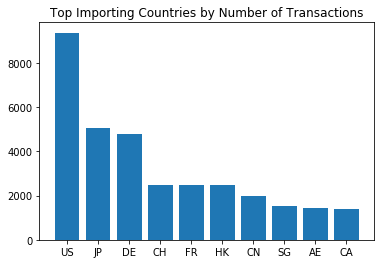

In [69]:
plt.bar(x=import_counts.index,height=import_counts)
plt.title("Top Importing Countries by Number of Transactions")

In [70]:
export_counts = df_raw.iloc[:,3].value_counts().head(10)
export_counts

NL    7170
ID    6260
IT    4978
US    4434
FR    3637
DE    2603
EC    1501
SG    1464
CN    1439
CH    1435
Name: Exporter, dtype: int64

Text(0.5, 1.0, 'Top Exporting Countries by Number of Transactions')

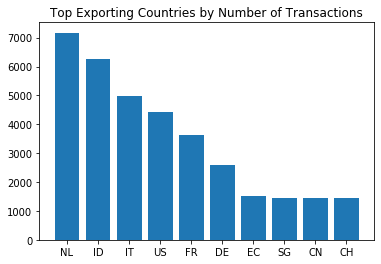

In [71]:
plt.bar(x=export_counts.index,height=export_counts)
plt.title("Top Exporting Countries by Number of Transactions")

Looking at the transaction quantities above, we see that there are 6 countries/territories that are in the top 10 for both exporting and importing international wildlife products: DE, FR, US, CH, SG, CN. Respectively, these are the territories of Germany, France, the United States, Switzerland, Singapore, and China. We can look more closely at what the US and China are importing to see market differences.

In [72]:
df_china_imports = pd.DataFrame([df_raw.iloc[i] for i in range(df_raw.shape[0]) if "CN" in df_raw.iloc[i,2]])
df_us_imports = pd.DataFrame([df_raw.iloc[i] for i in range(df_raw.shape[0]) if "US" in df_raw.iloc[i,2]])
us_counts = df_us_imports.iloc[:,4].value_counts().head(3)
china_counts = df_china_imports.iloc[:,4].value_counts().head(3)

Text(0.5, 1.0, 'Top US Imports')

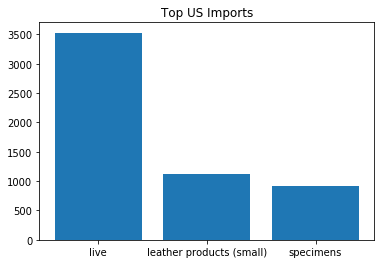

In [73]:
plt.bar(x=us_counts.index,height=us_counts)
plt.title("Top US Imports")

Text(0.5, 1.0, 'Top China Imports')

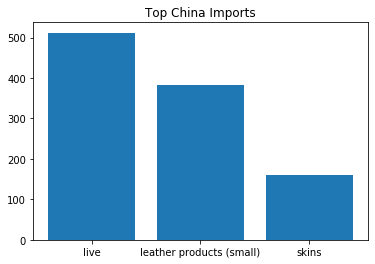

In [74]:
plt.bar(x=china_counts.index,height=china_counts)
plt.title("Top China Imports")

Text(0.5, 1.0, 'Elephant Item Imports (by quantity)')

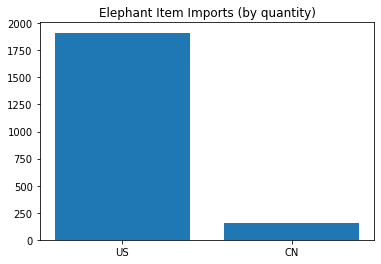

In [75]:
df_elephants = pd.DataFrame([df_raw.iloc[i] for i in range(df_raw.shape[0]) if "Elephantidae" in df_raw.iloc[i,1]])
df_elephants
df_us_elephants = pd.DataFrame([df_elephants.iloc[i] for i in range(df_elephants.shape[0]) if "US" in df_elephants.iloc[i,2]])
df_cn_elephants = pd.DataFrame([df_elephants.iloc[i] for i in range(df_elephants.shape[0]) if "CN" in df_elephants.iloc[i,2]])
us_elephant_count = total_traded(df_us_elephants)
cn_elephant_count = total_traded(df_cn_elephants)
plt.bar(x=['US','CN'],height=[us_elephant_count,cn_elephant_count])
plt.title("Elephant Item Imports (by quantity)")

Text(0.5, 1.0, 'Ivory Imports (by quantity)')

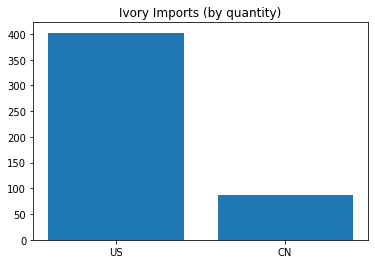

In [76]:
df_us_ivory = pd.DataFrame(df_us_elephants.iloc[i] for i in range(df_us_elephants.shape[0]) if "ivory" in df_us_elephants.iloc[i,4])
df_cn_ivory = pd.DataFrame(df_cn_elephants.iloc[i] for i in range(df_cn_elephants.shape[0]) if "ivory" in df_cn_elephants.iloc[i,4])
cn_ivory_count = total_traded(df_cn_ivory)
us_ivory_count = total_traded(df_us_ivory)
plt.bar(x=['US','CN'],height=[us_ivory_count,cn_ivory_count])
plt.title("Ivory Imports (by quantity)")

Text(0.5, 1.0, 'Top items Traded (by # of transactions)')

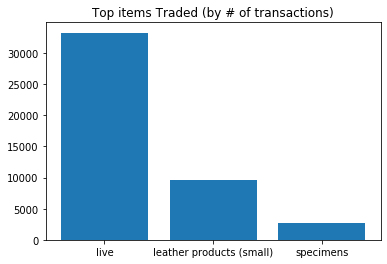

In [77]:
df_sort_type = df_raw.sort_values(by='Term')
term_values = df_sort_type.iloc[:,4].value_counts().head(3)
plt.bar(x=term_values.index,height=term_values)
plt.title("Top items Traded (by # of transactions)")

### In your final cells, discuss the modeling methods you expect to use. Start by clearly explaining if this is a classification, regression, clustering, or association rule mining problem? Justify.

I am expecting to use two different models for this data in order to explore two similar topics. The first topic aims to find association rules that can be prevalent between countries that are trading (importing and exporting), and items that are specifically being traded (i.e. live animals, hides, feathers, etc.). The second one aims to try and find a way to classify categorical variables of our dataset (specifically looking at the 'Term' item) by looking at traded quantities. This part will be looked at using a keras neural network in order to create our model. That way, we can look at numerical data from our dataframe and apply it to the categorical data of 'Terms'. 

### Finally, what is your overarching aim with this project? What are you hoping to learn? Or, what hypothesis are using the data to confirm or disprove? What challenges do you foresee on this project? Discuss your concerns. How will you get your work done? Give a reasonable list of milestones to reach to arrive at the final deadline for the project.

My overall aim with this project is to try and see where concentrated exchanges of wild animal products occur, as well as trying to deduce some method of trying to identify potential items being traded within interactions. While I could do this whole project focusing solely on the first objective, I did want to pursue a keras neural network of some sort in order to help hone my learning of applying machine learning skills. 

Looking into potential challenges within the project, I believe that one issue would be timeframe, considering that many classes are issuing finalized work/exams over our quarantine period. I'm expecting to spend a few days analyzing this dataset and applying my models, but my other concern is the mass amounts of data in my dataset (compared to what we've looked at before) may also take a significant amount of time to run and analyze, especially looking at hyperparameter performances where models are being analyzed multiple times and iterations. With this document done, I am hoping to spend around three whole days of time on the project: one day for completing apriori analysis, one day for working towards the keras objectives, and another day to finalize the final report. 